In [1]:
import pandas as pd
from random import randrange
import numpy as np

In [2]:
original_loaded_data = pd.read_csv('full_feature_dataframe_lifeline_training.csv')
#original_loaded_data = pd.read_csv('full_feature_dataframe_lifeline_testing.csv')

In [3]:
original_loaded_data.columns.tolist()

['Unnamed: 0',
 'date',
 'SPY_MID_close_50_slope',
 'SPY_MID_close_100_slope',
 'SPY_MID_close_200_slope',
 'SPY_MID_close_50_slope_2',
 'SPY_MID_close_50_slope_3',
 'SPY_MID_close_50_slope_4',
 'SPY_MID_close_300_slope',
 'SPY_MID_close_400_slope',
 'SPY_MID_close_500_slope',
 'SPY_OPTION_IMPLIED_VOLATILITY_close',
 'VIXY_MID_close_50_slope',
 'VIXY_MID_close_100_slope',
 'VIXY_MID_close_200_slope',
 'VIXY_MID_close_50_slope_2',
 'VIXY_MID_close_50_slope_3',
 'VIXY_MID_close_50_slope_4',
 'VIXY_MID_close_300_slope',
 'VIXY_MID_close_400_slope',
 'VIXY_MID_close_500_slope',
 'VIXY_OPTION_IMPLIED_VOLATILITY_close',
 'QQQ_MID_close_50_slope',
 'QQQ_MID_close_100_slope',
 'QQQ_MID_close_200_slope',
 'QQQ_MID_close_50_slope_2',
 'QQQ_MID_close_50_slope_3',
 'QQQ_MID_close_50_slope_4',
 'QQQ_MID_close_300_slope',
 'QQQ_MID_close_400_slope',
 'QQQ_MID_close_500_slope',
 'QQQ_OPTION_IMPLIED_VOLATILITY_close',
 'DIA_MID_close_50_slope',
 'DIA_MID_close_100_slope',
 'DIA_MID_close_200_slope',
 

In [4]:
training_data_columns_names = original_loaded_data.columns.tolist()
training_data_columns_names.append('duration_col')
training_data_columns_names.append('event_col')

training_data_columns_names.remove('Unnamed: 0')
training_data_columns_names.remove('date')
training_data_columns_names.remove('VIXY_ASK_close')
training_data_columns_names.remove('VIXY_BID_close')
training_data_columns_names.remove('SPY_ASK_close')
training_data_columns_names.remove('SPY_BID_close')
training_data_columns_names.remove('SPY_MID_close')
training_data_columns_names.remove('ml_target')

In [5]:
original_loaded_data_row = original_loaded_data.shape[0]

In [6]:
original_loaded_data.shape

(11000, 60)

In [7]:
original_loaded_data.head()

,Unnamed: 0,date,SPY_MID_close_50_slope,SPY_MID_close_100_slope,SPY_MID_close_200_slope,SPY_MID_close_50_slope_2,SPY_MID_close_50_slope_3,SPY_MID_close_50_slope_4,SPY_MID_close_300_slope,SPY_MID_close_400_slope,...,VIX_TRADES_close_400_slope,VIX_TRADES_close_500_slope,VIX_OPTION_IMPLIED_VOLATILITY_close,vix_index_mv_ratio,ml_target,VIXY_ASK_close,VIXY_BID_close,SPY_ASK_close,SPY_BID_close,SPY_MID_close
0,0,20130819 13:00:00,-0.095558,-0.036877,0.004518,-0.095558,-0.095558,-0.095558,0.035726,0.023482,...,-0.012297,-0.002700,0.805901,5.345278,0,3271.2,3268.8,165.50,165.49,"[157.725, 158.89499999999998, 158.454999999999..."
1,1,20130819 14:00:00,-0.097307,-0.039081,0.003488,-0.097307,-0.097307,-0.097307,0.035536,0.023561,...,-0.012343,-0.002737,0.707146,5.353685,0,3284.0,3281.6,165.38,165.37,"[158.89499999999998, 158.45499999999998, 159.0..."
2,2,20130819 15:00:00,-0.100069,-0.041873,0.002357,-0.100069,-0.100069,-0.100069,0.035304,0.023598,...,-0.012378,-0.002772,0.709114,5.384406,0,3315.2,3312.0,164.78,164.77,"[158.45499999999998, 159.095, 159.085, 156.435..."
3,3,20130820 09:30:00,-0.102162,-0.044382,0.001288,-0.102162,-0.102162,-0.102162,0.035106,0.023649,...,-0.012416,-0.002806,0.688049,5.328359,0,3321.6,3319.2,165.08,165.07,"[159.095, 159.085, 156.435, 156.585, 156.255, ..."
4,4,20130820 10:00:00,-0.102162,-0.046487,0.000295,-0.102162,-0.102162,-0.102162,0.034930,0.023692,...,-0.012457,-0.002851,0.749690,5.176801,0,3296.0,3293.6,165.59,165.58,"[159.085, 156.435, 156.585, 156.255, 156.585, ..."


In [8]:
original_loaded_data.iloc[100][2:54]

SPY_MID_close_50_slope                   0.07179
SPY_MID_close_100_slope                -0.018269
SPY_MID_close_200_slope                -0.040239
SPY_MID_close_50_slope_2                 0.07179
SPY_MID_close_50_slope_3                 0.07179
SPY_MID_close_50_slope_4                 0.07179
SPY_MID_close_300_slope                -0.017362
SPY_MID_close_400_slope                 0.010315
SPY_MID_close_500_slope                 0.010383
SPY_OPTION_IMPLIED_VOLATILITY_close     0.135759
VIXY_MID_close_50_slope                -5.575318
VIXY_MID_close_100_slope                2.812776
VIXY_MID_close_200_slope                2.282422
VIXY_MID_close_50_slope_2              -5.575318
VIXY_MID_close_50_slope_3              -5.575318
VIXY_MID_close_50_slope_4              -5.575318
VIXY_MID_close_300_slope               -0.698677
VIXY_MID_close_400_slope               -3.370485
VIXY_MID_close_500_slope               -2.847328
VIXY_OPTION_IMPLIED_VOLATILITY_close    0.653712
QQQ_MID_close_50_slo

In [9]:
last_valid_data = 54

In [10]:
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (15,8)

# sample_probability = []
# for index in range(1,original_loaded_data_row-60):
#     sample_probability.append((index/100)**3)
# sample_probability = sample_probability/np.sum(sample_probability)
# sample_probability = sample_probability.tolist()

# plt.plot(sample_probability)
# plt.show()

In [11]:
# possible_sample_index = np.arange(1, original_loaded_data_row-60)

In [12]:
# vix_cutoff = np.quantile(original_loaded_data['vix_index_mv_ratio'].tolist(),0.98)
# print(vix_cutoff)

In [13]:
#construct a duration column and an event column
max_training_example = 2000000
last_event = 0
example_counter = 0
training_data = np.zeros((max_training_example,last_valid_data))

for new_row_index in range(0,max_training_example):
    
    if new_row_index%10000 == 0:
        print('finished ',new_row_index/max_training_example)

    #pick a random starting row and a random ending row
    start_row = randrange(0,original_loaded_data_row-60)
    #start_row = np.random.choice(possible_sample_index, p=sample_probability)
    end_row = randrange(start_row+1,start_row+50)

    #extract the vix_index_mv_ratio between start and end
    vix_index_mv_ratio_data = original_loaded_data.iloc[start_row:end_row]['ml_target'].tolist()
    duration = len(vix_index_mv_ratio_data)
    
    event = 0 #0 means not occured and 1 means occured
    if vix_index_mv_ratio_data[0] <= 0:
        for entry in vix_index_mv_ratio_data:
            if entry >= 1:
                event = 1
                break

#     event = 0 #0 means not occured and 1 means occured
#     if all(vix_index_mv_ratio_data[0:10]) < 6:
#         for entry in vix_index_mv_ratio_data[10:]:
#             if entry > 6:
#                 event = 1
#                 break
#     event = 0
#     for entry in vix_index_mv_ratio_data:
#         if entry > 6:
#             event = 1
#             break
    
#     extracted_signal = original_loaded_data.iloc[start_row:end_row]['vix_index_intervals_since_6'].tolist()
#     duration = len(extracted_signal)
#     event = 0 #0 means not occured and 1 means occured
#     for entry in extracted_signal:
#         if entry == 1:
#             event = 1
#             break
    
    
    if event != last_event:
        last_event = event
        
        
        
        #one row of training data
        one_training_data = original_loaded_data.iloc[start_row][2:last_valid_data].to_numpy()

        #add noise for convergence
        noise = np.random.normal(0, 0.5, size=(one_training_data.shape[0],))
        one_training_data = one_training_data*(1+noise/100)


        one_training_data = np.concatenate((one_training_data,[duration,event]),axis = 0)

        #add to the training data frame
        #training_data.loc[new_row_index] = one_training_data
    
        #add to training examples
        training_data[example_counter,:] = one_training_data.T
        
        example_counter += 1
        


finished  0.0
finished  0.005
finished  0.01
finished  0.015
finished  0.02
finished  0.025
finished  0.03
finished  0.035
finished  0.04
finished  0.045
finished  0.05
finished  0.055
finished  0.06
finished  0.065
finished  0.07
finished  0.075
finished  0.08
finished  0.085
finished  0.09
finished  0.095
finished  0.1
finished  0.105
finished  0.11
finished  0.115
finished  0.12
finished  0.125
finished  0.13
finished  0.135
finished  0.14
finished  0.145
finished  0.15
finished  0.155
finished  0.16
finished  0.165
finished  0.17
finished  0.175
finished  0.18
finished  0.185
finished  0.19
finished  0.195
finished  0.2
finished  0.205
finished  0.21
finished  0.215
finished  0.22
finished  0.225
finished  0.23
finished  0.235
finished  0.24
finished  0.245
finished  0.25
finished  0.255
finished  0.26
finished  0.265
finished  0.27
finished  0.275
finished  0.28
finished  0.285
finished  0.29
finished  0.295
finished  0.3
finished  0.305
finished  0.31
finished  0.315
finished  0.

In [14]:
training_data.shape

(2000000, 54)

In [15]:
training_data = training_data[0:example_counter,:]
training_data = pd.DataFrame(training_data,columns = training_data_columns_names)

In [16]:
training_data.shape

(246550, 54)

In [17]:
training_data.head()

,SPY_MID_close_50_slope,SPY_MID_close_100_slope,SPY_MID_close_200_slope,SPY_MID_close_50_slope_2,SPY_MID_close_50_slope_3,SPY_MID_close_50_slope_4,SPY_MID_close_300_slope,SPY_MID_close_400_slope,SPY_MID_close_500_slope,SPY_OPTION_IMPLIED_VOLATILITY_close,...,VIX_TRADES_close_50_slope_2,VIX_TRADES_close_50_slope_3,VIX_TRADES_close_50_slope_4,VIX_TRADES_close_300_slope,VIX_TRADES_close_400_slope,VIX_TRADES_close_500_slope,VIX_OPTION_IMPLIED_VOLATILITY_close,vix_index_mv_ratio,duration_col,event_col
0,-0.408972,-0.257822,-0.123345,-0.410695,-0.411276,-0.411034,-0.063240,-0.076420,-0.071938,0.231669,...,0.155136,0.156414,0.156718,0.006761,0.016843,0.023016,1.143564,5.305653,39.0,1.0
1,-0.128324,-0.037861,-0.024332,-0.127954,-0.128220,-0.128244,-0.002794,-0.003647,-0.007239,0.206819,...,0.160142,0.159902,0.158148,-0.004054,-0.001054,0.001613,1.266685,6.665315,31.0,0.0
2,0.041799,0.066670,0.035880,0.041803,0.042488,0.042341,0.037836,0.037609,0.012479,0.087323,...,0.002158,0.002151,0.002153,-0.015873,-0.024945,-0.016435,0.937118,4.930818,49.0,1.0
3,0.138744,0.091331,0.052775,0.138650,0.137400,0.138474,0.055148,0.045004,0.040939,0.077115,...,0.011854,0.011858,0.011858,-0.005865,-0.002653,-0.000396,0.832200,5.048789,13.0,0.0
4,-0.114991,-0.009383,-0.008253,-0.114943,-0.114831,-0.113773,0.025742,0.044798,0.038209,0.139930,...,0.025572,0.025461,0.025477,-0.000948,-0.019066,-0.026884,0.922985,5.046934,32.0,1.0


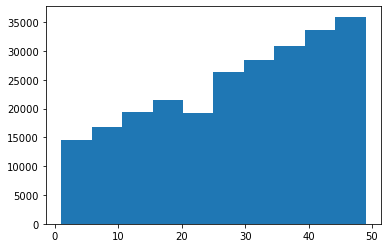

In [18]:
import matplotlib.pyplot as plt
plt.hist(training_data['duration_col'])
plt.show()

In [19]:
from lifelines import CoxPHFitter

In [20]:

cph = CoxPHFitter(penalizer = 0.001,l1_ratio = 0.5) #sparse
#cph = CoxPHFitter() 
cph.fit(training_data, duration_col='duration_col', event_col='event_col',show_progress = True)

Iteration 1: norm_delta = 1.88981, step_size = 0.9000, log_lik = -1389743.62462, newton_decrement = 13104.31127, seconds_since_start = 1.2
Iteration 2: norm_delta = 0.57208, step_size = 0.9000, log_lik = -1375732.83384, newton_decrement = 992.54582, seconds_since_start = 2.2
Iteration 3: norm_delta = 0.11582, step_size = 0.9000, log_lik = -1373549.70571, newton_decrement = 39.09996, seconds_since_start = 3.1
Iteration 4: norm_delta = 0.07524, step_size = 1.0000, log_lik = -1372651.65255, newton_decrement = 1.51499, seconds_since_start = 3.6
Iteration 5: norm_delta = 0.07329, step_size = 1.0000, log_lik = -1372015.63446, newton_decrement = 1.57670, seconds_since_start = 4.1
Iteration 6: norm_delta = 0.06762, step_size = 1.0000, log_lik = -1371550.67877, newton_decrement = 1.45998, seconds_since_start = 5.4
Iteration 7: norm_delta = 0.06018, step_size = 1.0000, log_lik = -1371215.26742, newton_decrement = 1.25843, seconds_since_start = 7.0
Iteration 8: norm_delta = 0.05241, step_size = 1

<lifelines.CoxPHFitter: fitted with 246550 total observations, 123275 right-censored observations>

In [21]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 246550 total observations, 123275 right-censored observations>
             duration col = 'duration_col'
                event col = 'event_col'
                penalizer = 0.001
                 l1 ratio = 0.5
      baseline estimation = breslow
   number of observations = 246550
number of events observed = 123275
   partial log-likelihood = -1370459.52
         time fit was run = 2021-07-16 19:04:59 UTC

---
                                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                    
SPY_MID_close_50_slope                 0.46       1.58       0.72            -0.96             1.88                 0.38                 6.52
SPY_MID_close_100_slope               -8.22       0.00       0.33            -8.86            -7.58                 0.00                 0.00
SPY_MID_close_200_slope              -13.87       0.00       0.57           -14.98           -12.76                 0.00                 0.00
SPY_MID_close_50_slope_2               0.68       1.97       0.72            -0.74             2.09                 0.48                 8.10
SPY_MID_close_50_slope_3               0.40       1.49       0.72            -1.02             1.81                 0.36                 6.14
SPY_MID_close_50_slope_4               0.66       1.93       0.72            -0.76             2.07                 0.47                 7.96
SPY_MID_close_300_slope                2.54      12.65       0.73             1.11             3.96                 3.04                52.58
SPY_MID_close_400_slope               -0.90       0.41       1.51            -3.86             2.06                 0.02                 7.81
SPY_MID_close_500_slope               -9.20       0.00       1.52           -12.18            -6.22                 0.00                 0.00
SPY_OPTION_IMPLIED_VOLATILITY_close   -3.37       0.03       0.39            -4.12            -2.61                 0.02                 0.07
VIXY_MID_close_50_slope               -0.02       0.98       0.04            -0.10             0.05                 0.91                 1.05
VIXY_MID_close_100_slope               0.07       1.07       0.00             0.06             0.08                 1.06                 1.08
VIXY_MID_close_200_slope               0.11       1.11       0.01             0.09             0.13                 1.09                 1.14
VIXY_MID_close_50_slope_2             -0.01       0.99       0.04            -0.09             0.06                 0.91                 1.06
VIXY_MID_close_50_slope_3             -0.01       0.99       0.04            -0.09             0.06                 0.92                 1.07
VIXY_MID_close_50_slope_4             -0.02       0.98       0.04            -0.09             0.06                 0.91                 1.06
VIXY_MID_close_300_slope              -0.32       0.72       0.02            -0.36            -0.29                 0.70                 0.75
VIXY_MID_close_400_slope               0.35       1.42       0.03             0.30             0.40                 1.34                 1.49
VIXY_MID_close_500_slope              -0.43       0.65       0.02            -0.47            -0.40                 0.62                 0.67
VIXY_OPTION_IMPLIED_VOLATILITY_close   1.40       4.05       0.05             1.30             1.50                 3.67                 4.46
QQQ_MID_close_50_slope                 0.48       1.62       0.99            -1.45             2.42                 0.23                11.22
QQQ_MID_close_100_slope               -0.21       0.81       0.24            -0.67             0.25                 0.51                 1.29
QQQ_MID_close_200_slope                5.69     295.03       0.47             4.77             6.60               118.08               737.17

<AxesSubplot:xlabel='log(HR) (95% CI)'>

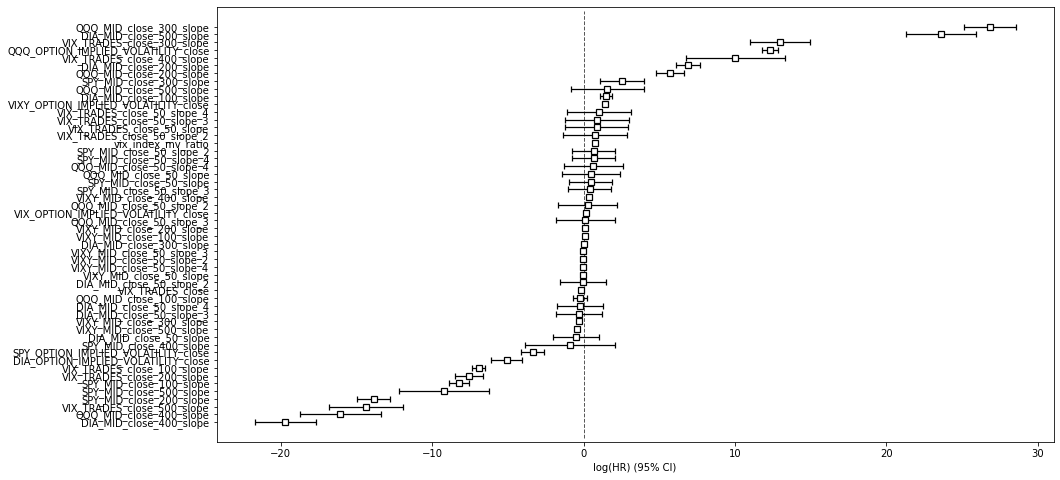

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

cph.plot()

In [23]:
#testing the model
original_testing_data = pd.read_csv('full_feature_dataframe_lifeline_testing.csv')
#original_testing_data = pd.read_csv('full_feature_dataframe_lifeline_training.csv')

In [24]:
original_testing_data

,Unnamed: 0,date,SPY_MID_close_50_slope,SPY_MID_close_100_slope,SPY_MID_close_200_slope,SPY_MID_close_50_slope_2,SPY_MID_close_50_slope_3,SPY_MID_close_50_slope_4,SPY_MID_close_300_slope,SPY_MID_close_400_slope,...,VIX_TRADES_close_400_slope,VIX_TRADES_close_500_slope,VIX_OPTION_IMPLIED_VOLATILITY_close,vix_index_mv_ratio,ml_target,VIXY_ASK_close,VIXY_BID_close,SPY_ASK_close,SPY_BID_close,SPY_MID_close
0,0,20191206 14:00:00,-0.026177,0.017868,0.054080,-0.026177,-0.026177,-0.026177,0.073268,0.055772,...,-0.011188,-0.010767,0.900767,4.873522,0,54.84,54.80,314.96,314.95,"[291.225, 293.185, 293.795, 293.985, 293.275, ..."
1,1,20191206 15:00:00,-0.019564,0.017759,0.053876,-0.019564,-0.019564,-0.019564,0.073123,0.056028,...,-0.011219,-0.010681,0.901323,4.884526,0,55.12,55.08,314.83,314.82,"[293.185, 293.795, 293.985, 293.275, 293.405, ..."
2,2,20191209 09:30:00,-0.011811,0.017981,0.053637,-0.011811,-0.011811,-0.011811,0.073038,0.056283,...,-0.011219,-0.010576,0.923436,5.119067,0,55.44,55.40,314.97,314.96,"[293.795, 293.985, 293.275, 293.405, 292.835, ..."
3,3,20191209 10:00:00,-0.003140,0.018316,0.053380,-0.003140,-0.003140,-0.003140,0.072998,0.056537,...,-0.011209,-0.010464,0.937183,5.163271,0,55.72,55.68,315.02,315.01,"[293.985, 293.275, 293.405, 292.835, 293.28499..."
4,4,20191209 11:00:00,0.004335,0.018815,0.053033,0.004335,0.004335,0.004335,0.072889,0.056765,...,-0.011188,-0.010358,0.940358,5.259769,0,56.08,56.04,314.60,314.59,"[293.275, 293.405, 292.835, 293.28499999999997..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,2754,20210709 11:00:00,0.113437,0.159960,0.083305,0.113437,0.113437,0.113437,0.059311,0.037578,...,-0.007539,-0.004224,1.091531,4.791012,0,24.26,24.25,434.73,434.72,"[412.53499999999997, 414.225, 414.095, 414.275..."
2755,2755,20210709 12:00:00,0.115327,0.157999,0.084040,0.115327,0.115327,0.115327,0.059969,0.038036,...,-0.007670,-0.004245,1.070323,4.770357,0,23.99,23.98,434.84,434.83,"[414.225, 414.095, 414.275, 411.125, 409.435, ..."
2756,2756,20210709 13:00:00,0.116915,0.156237,0.085015,0.116915,0.116915,0.116915,0.060622,0.038503,...,-0.007805,-0.004268,1.072386,4.774538,0,24.02,24.01,434.97,434.96,"[414.095, 414.275, 411.125, 409.435, 407.795, ..."
2757,2757,20210709 14:00:00,0.118903,0.154589,0.085994,0.118903,0.118903,0.118903,0.061503,0.038985,...,-0.007938,-0.004292,1.068402,4.813104,0,24.03,24.02,435.58,435.57,"[414.275, 411.125, 409.435, 407.795, 407.765, ..."


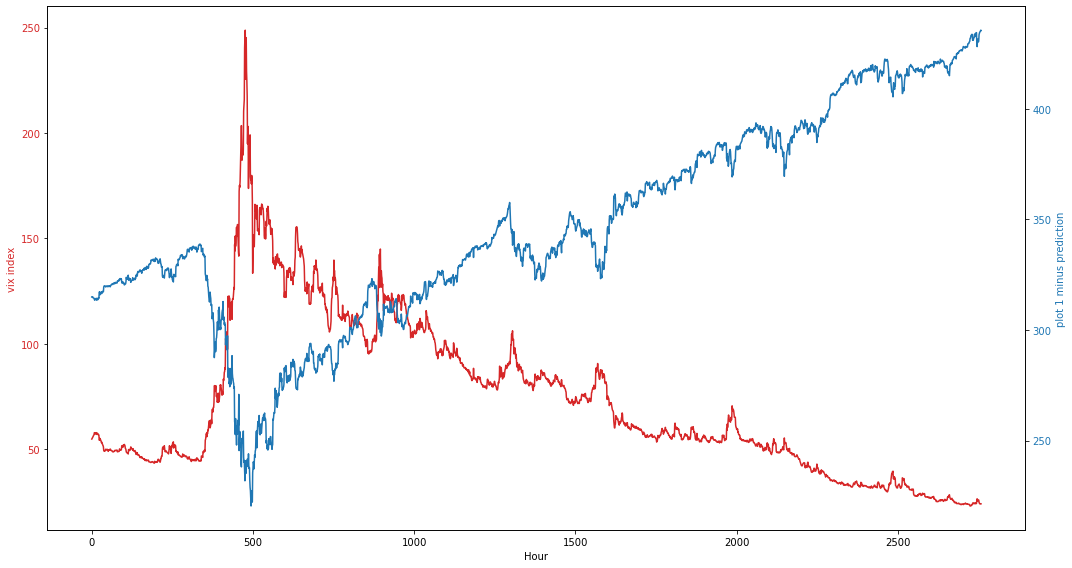

In [25]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Hour')
ax1.set_ylabel('vix index', color=color)
ax1.plot(original_testing_data['VIXY_BID_close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('plot 1 minus prediction', color=color)  # we already handled the x-label with ax1
ax2.plot(original_testing_data['SPY_BID_close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

#ax2.hlines(0.5,0,len(plot_prediction),colors = 'black')


plt.show()

In [26]:
# plot_prediction = []

# for event_index in range(0,original_testing_data.shape[0]):
    
#     prediction = cph.predict_survival_function(original_testing_data.iloc[event_index,2:last_valid_data])[event_index].tolist()
#     prediction = np.mean(prediction[-10:])
    
#     plot_prediction.append(1-prediction)

In [27]:
# plot_begin = 0
# plot_end = 23000

    
# plt.rcParams["figure.figsize"] = (15,8)

# fig, ax1 = plt.subplots()
# color = 'tab:red'
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('vix index', color=color)
# ax1.plot(original_testing_data['vix_index_mv_ratio'].tolist()[plot_begin:plot_end], color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #ax1.hlines(6,0,len(plot_prediction),colors = 'black')


# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:blue'
# ax2.set_ylabel('plot 1 minus prediction', color=color)  # we already handled the x-label with ax1
# ax2.plot(plot_prediction[plot_begin:plot_end], color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# fig.tight_layout()  # otherwise the right y-label is slightly clipped

# #ax2.hlines(0.5,0,len(plot_prediction),colors = 'black')


# plt.show()   

In [28]:
# plot_begin = 0
# plot_end = 200000

    
# plt.rcParams["figure.figsize"] = (15,8)

# fig, ax1 = plt.subplots()
# color = 'tab:red'
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('vix index', color=color)
# ax1.plot(original_testing_data['VIXY_BID_close'].tolist()[plot_begin:plot_end], color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #ax1.hlines(6,0,len(plot_prediction),colors = 'black')


# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:blue'
# ax2.set_ylabel('plot 1 minus prediction', color=color)  # we already handled the x-label with ax1
# ax2.plot(plot_prediction[plot_begin:plot_end], color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# fig.tight_layout()  # otherwise the right y-label is slightly clipped

# #ax2.hlines(0.5,0,len(plot_prediction),colors = 'black')


# plt.show()   

In [29]:
#save the model
from pickle import loads, dumps
import pickle

In [30]:
with open('lifeline_model.pickle', 'wb') as f:
    pickle.dump(cph, f) # saving my trained cph model as my.pickle